In [ ]:
!pip install yfinance

In [1004]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import tree
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
close = yfinance.download('BTC-USD', period='700d', interval='1h')[['Close']]

The pct_change() method returns a DataFrame with the percentage difference between the values for each row and, by default, the previous row

In [969]:
returns = close.pct_change().values

In [970]:
df_log = pd.DataFrame(returns, columns=['Returns'])

I predict the direction of returns

In [971]:
df_log['target'] = np.where(df_log.iloc[:, 0:1].diff(-1).values <= 0, 1, 0)

In [975]:
df_log.head(4)

,Returns,target
0,NaN,0
1,-0.001702,1
2,0.001115,0
3,-0.000010,1


In [976]:
df_log = df_log.dropna()

In [1016]:
timestamp = 20 # I classify a 20-dimensional space into two classes

X = []
Y = []

for k in range(len(df_log)-timestamp):
  X.append(df_log.iloc[k : k + timestamp, 0])
  Y.append(df_log.iloc[k + timestamp -1, 1])

X = np.array(X)
Y = np.array(Y)

In [1017]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

In [1018]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

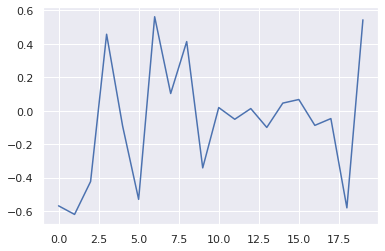

In [1037]:
plt.plot(X_train[0])

##SVM Model

In [1020]:
svm_model = SVC(kernel='rbf', C=1.0, gamma=0.0004) #Support Vector Classifier

In [1021]:
svm_model = svm_model.fit(X_train, y_train)

In [1022]:
y_pred = svm_model.predict(X_test)

In [1023]:
acc = accuracy_score(y_test, y_pred)
f1_s = f1_score(y_test, y_pred)

In [1024]:
print(f"accuracy score: {acc}")
print(f"f1 score: {f1_s}")

accuracy score: 0.748587570621469
f1 score: 0.7287766652154986


##Random Forest

In [1025]:
 RandomF_model = RandomForestRegressor(n_estimators=20, random_state=0)

In [1026]:
RandomF_model = RandomF_model.fit(X_train, y_train)

In [1027]:
y_pred = RandomF_model.predict(X_test)

In [1028]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [1029]:
acc = accuracy_score(y_test, y_pred)
f1_s = f1_score(y_test, y_pred)

In [1030]:
print(f"accuracy score: {acc}")
print(f"f1 score: {f1_s}")

accuracy score: 0.7263922518159807
f1 score: 0.7212171052631579


##Decision Tree

In [1031]:
tree_model = tree.DecisionTreeClassifier()

In [1032]:
tree_model = tree_model.fit(X_train, y_train)

In [1033]:
y_pred = tree_model.predict(X_test)

In [1034]:
acc = accuracy_score(y_test, y_pred)
f1_s = f1_score(y_test, y_pred)

In [1035]:
print(f"accuracy score: {acc}")
print(f"f1 score: {f1_s}")

accuracy score: 0.655367231638418
f1 score: 0.6459369817578773
